# Desafio Digital Bemol

- Com base nos dados e informações apresentadas, responda as perguntas abaixo:

    <ul>
    <li>1ª - Qual o imposto total a ser pago pela empresa? Qual o imposto por unidade?</li>
    <li>2ª - Qual o produto que mais vende? (Analisar por quantidade de produtos e não pelo valor financeiro)</li>
    <li>3º - Quanto cada produto representa sobre o total de vendas da empresa?</li>
    <li>4ª - Qual o lucro de cada loja após descontos de impostos?</li>
    <li>5ª - Qual período que cada loja mais vendeu em R$ e qual o valor?</li>
    </ul>

Importando as bibliotecas as bibliotecas

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline


In [37]:
# Ler os dados do arquivo excel
df = pd.read_excel(r'./dados/Desafio Digital - 2023.xlsx', engine='openpyxl', sheet_name="Dados - Questão 1", decimal='.')


### Separar as tabelas presentes na aba em dataframes para uma melhor organização

In [38]:
# dados
dados = df.iloc[:,:7]

# vendedores
vendedores = df.iloc[1:31, [8,9]]
vendedores.columns = ["Cod_vendedor", "Vendedores"]
vendedores.head()


,Cod_vendedor,Vendedores
1,17988,Luciana
2,14522,Marcela
3,15176,Larissa
4,5657,Vanessa
5,4428,Giovanna


### Com os dataframes separados, é hora de fazermos os tratamentos adequados

- No dataframe `dados` deve ser feitas algumas alterações

In [39]:

dados.rename(columns={'Cod_vendedorr':'Cod_Vendedor'}, inplace=True)
dados['Centro'] = dados['Centro'].astype(str)
dados['Unidade'].replace('Ammazonas Shoping','Amazonas Shopping', inplace=True)
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Centro          899 non-null    object        
 1   Unidade         899 non-null    object        
 2   Produto         899 non-null    object        
 3   Valor unitário  899 non-null    int64         
 4   Cod_Vendedor    899 non-null    int64         
 5   Qtd             899 non-null    int64         
 6   Data_compra     899 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 49.3+ KB


In [40]:
dados['Centro'].value_counts()


Centro
102    166
104    150
106    149
105    147
101    146
103    141
Name: count, dtype: int64

- Os nomes de alguns produtos precisam ser tratados para a análise ser feita

In [41]:
dados['Produto'].replace('IPHOne','Iphone', inplace=True)
dados['Produto'].replace('iPHONE','Iphone', inplace=True)
dados['Produto'].replace('SAMSUNG','Samsung', inplace=True)
dados['Produto'].replace('samsungsamsung','Samsung', inplace=True)
dados['Produto'].replace('XBOX SERIESSSS','Xbox series s', inplace=True)
dados['Produto'].replace('Cadeira%Gamer','Cadeira Gamer', inplace=True)
dados['Produto'].replace('Fone d Ouvido','Fone de Ouvido', inplace=True)
dados['Produto'].replace('Ar_condicionado','Ar condicionado', inplace=True)

# Salvar o dataset alterado em um arquivo csv
dados.to_csv(r'./dados/tabela_alterada.csv', header=True, index=False)

dados['Produto'].value_counts()


Produto
Mi Band 6          48
Bebedouro          43
Sofá               42
Jogo de Panela     41
Fogão              41
Ar condicionado    40
Geladeira          40
Iphone             40
Cadeira Gamer      39
Teclado            39
Televisão          37
Mouse              37
Brinquedos         37
Xbox series s      36
Berço              36
Samsung            36
Powerbank          36
Bicicleta          34
Monitor            34
Cama               34
Guarda Roupa       34
Microondas         33
Fone de Ouvido     31
Notebook           31
Name: count, dtype: int64

In [42]:
dados['Valor vendido'] = dados['Qtd'] * dados['Valor unitário']
dados.head()


,Centro,Unidade,Produto,Valor unitário,Cod_Vendedor,Qtd,Data_compra,Valor vendido
0,101,Avenida,Brinquedos,400,49590,17,2021-04-25,6800
1,103,Cidade Nova,Berço,690,55354,14,2021-03-24,9660
2,106,Avenida,Fogão,1834,19231,3,2021-03-31,5502
3,104,Avenida,Powerbank,120,19231,5,2021-06-16,600
4,104,Amazonas Shopping,Mi Band 6,400,15176,20,2022-02-24,8000


## 1ª - Qual o imposto total a ser pago pela empresa? Qual o imposto por unidade?

In [43]:
impostos = pd.DataFrame(dados.groupby('Unidade')['Valor vendido'].sum())

faixa_receita = [
    (0, 2100000),
    (2100000.01, 2400000),
    (2400000.01, float('inf'))
]

aliquotas = [0.05, 0.12, 0.17]

# Função para calcular o imposto
def calcular_imposto(valor_total):
    for faixa, aliquota in zip(faixa_receita, aliquotas):
        if faixa[0] < valor_total <= faixa[1]:
            return valor_total * aliquota
    return 0

impostos['imposto Pago'] = impostos['Valor vendido'].apply(calcular_imposto)
total_imposto_pago = impostos['imposto Pago'].sum().round(decimals=2)

print(f'O imposto total a ser pago pela empresa é: R${total_imposto_pago}')


O imposto total a ser pago pela empresa é: R$1501850.49


<Axes: title={'center': 'Porcentagem de imposto pago por unidade'}, ylabel='imposto Pago'>

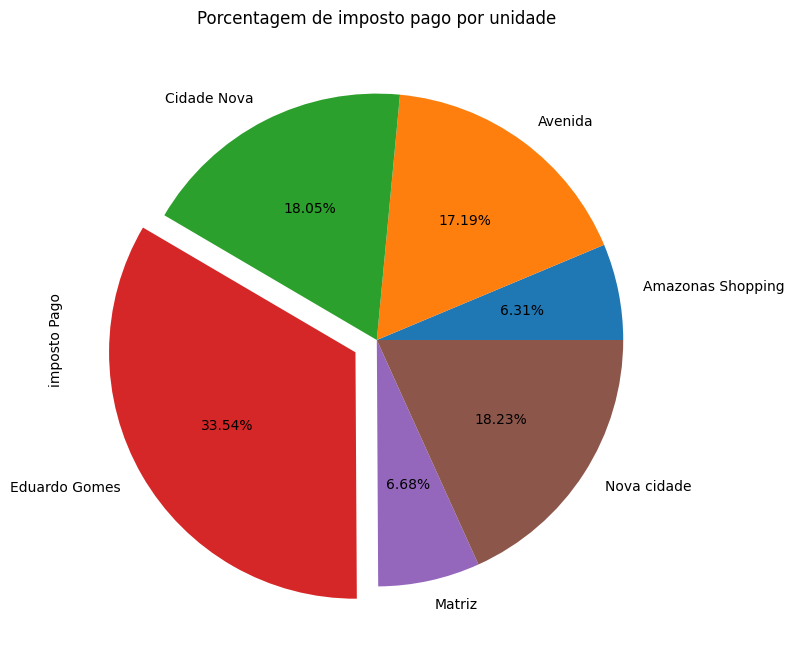

In [44]:
# Gráfico do montante de imposto pago por unidade
impostos['imposto Pago'].plot(
    kind='pie',
    title="Porcentagem de imposto pago por unidade",
    autopct='%1.2f%%',
    figsize=(8,8),
    explode=[0, 0, 0, 0.10, 0, 0]
)


## 2ª - Qual o produto que mais vende? (Analisar por quantidade de produtos e não pelo valor financeiro)

<Axes: title={'center': 'Produtos mais vendidos'}, xlabel='Produto'>

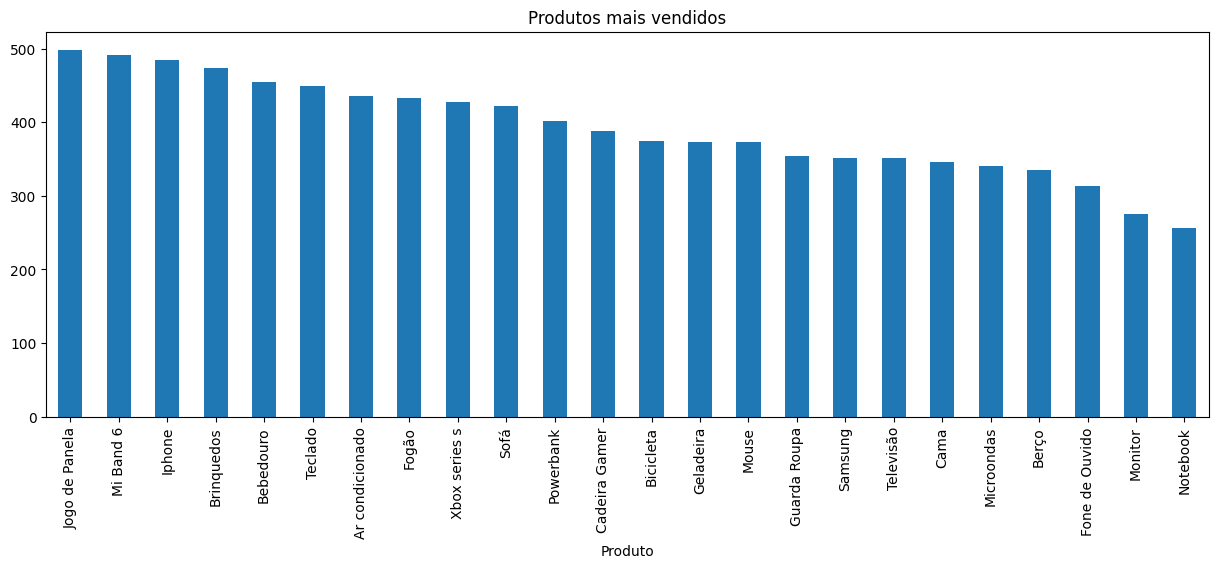

In [45]:
produto_por_qtd = dados.groupby('Produto')['Qtd'].sum()
produto_por_qtd.sort_values(ascending=False).plot.bar(title='Produtos mais vendidos', figsize = (15,5))


## 3º - Quanto cada produto representa sobre o total de vendas da empresa?

In [46]:
total_vendido = dados['Valor vendido'].sum()
vendas_por_produto = pd.DataFrame(dados.groupby(['Produto'])['Valor vendido'].sum())

vendas_por_produto['Porcent nas Vendas'] = (vendas_por_produto['Valor vendido'] / total_vendido) * 100
vendas_por_produto.sort_values(by='Porcent nas Vendas', ascending=False, inplace=True)
vendas_por_produto


,Valor vendido,Porcent nas Vendas
Produto,,
Iphone,3630000,26.775523
Geladeira,1289088,9.508542
Xbox series s,854000,6.299255
Televisão,814320,6.006569
Notebook,797440,5.882059
Fogão,794122,5.857585
Ar condicionado,741200,5.467223
Sofá,654100,4.824758
Samsung,598400,4.413904


<Axes: title={'center': 'Porcentagem da venda de cada produto sobre o total vendido pela empresa'}, ylabel='Valor vendido'>

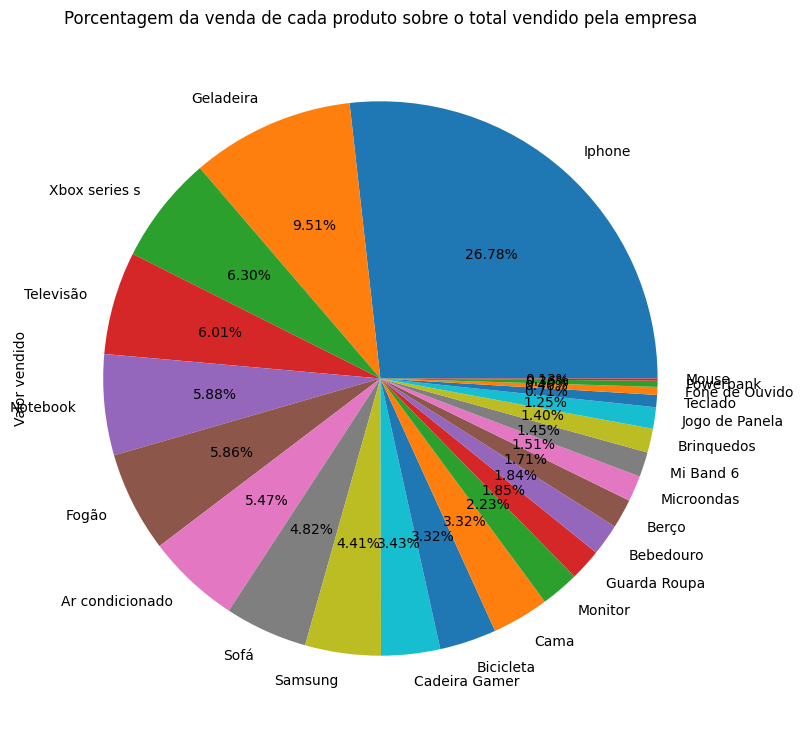

In [47]:
vendas_por_produto.plot(
    y='Valor vendido',
    kind='pie',
    title="Porcentagem da venda de cada produto sobre o total vendido pela empresa",
    autopct='%1.2f%%',
    figsize=(9,9),
    legend=False
)


## 4ª - Qual o lucro de cada loja após descontos de impostos?

In [48]:
lucros = impostos.copy()
lucros['Lucro obtido'] = impostos['Valor vendido'] - impostos['imposto Pago']
lucros.drop(labels='Valor vendido', axis=1, inplace=True)

lucros


,imposto Pago,Lucro obtido
Unidade,,
Amazonas Shopping,94784.45,1800904.55
Avenida,258169.92,1893246.08
Cidade Nova,271083.00,1987942.00
Eduardo Gomes,503677.19,2459129.81
Matriz,100321.85,1906115.15
Nova cidade,273814.08,2007969.92


<Axes: xlabel='Unidades', ylabel='Valor em reais (R$)'>

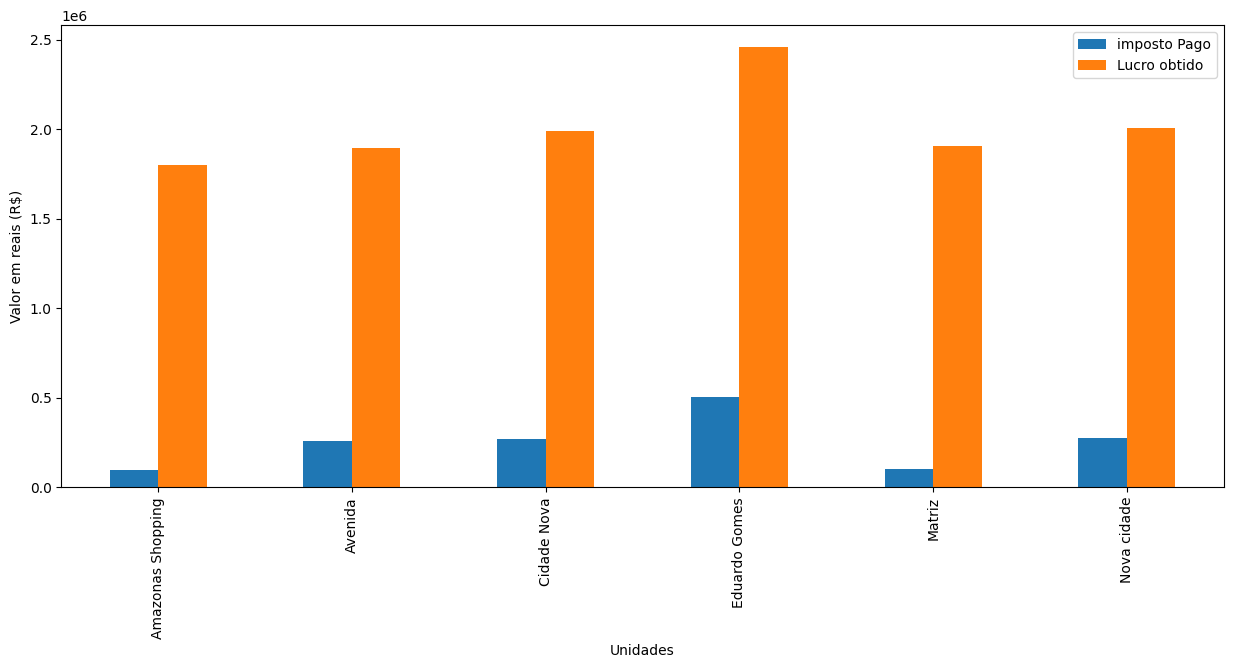

In [49]:
lucros.plot(
    kind='bar',
    xlabel='Unidades',
    ylabel='Valor em reais (R$)',
    figsize=(15,6),
    )


## 5ª - Qual período que cada loja mais vendeu em R$ e qual o valor?

In [86]:
vendas_datas = dados.copy()
vendas_datas['Mês da venda'] = dados['Data_compra'].dt.month_name()
vendas_datas['Ano da venda'] = dados['Data_compra'].dt.year
vendas_2021 = vendas_datas[vendas_datas['Ano da venda'] == 2021]
vendas_2022 = vendas_datas[vendas_datas['Ano da venda'] == 2022]


,Centro,Unidade,Produto,Valor unitário,Cod_Vendedor,Qtd,Data_compra,Valor vendido,Mês da venda,Ano da venda
4,104,Amazonas Shopping,Mi Band 6,400,15176,20,2022-02-24,8000,February,2022
11,103,Cidade Nova,Microondas,600,55354,16,2022-01-19,9600,January,2022
15,101,Eduardo Gomes,Ar condicionado,1700,481,13,2022-01-17,22100,January,2022
18,103,Eduardo Gomes,Ar condicionado,1700,41311,4,2022-02-17,6800,February,2022
25,106,Nova cidade,Iphone,7500,49592,16,2022-02-19,120000,February,2022
...,...,...,...,...,...,...,...,...,...,...
858,103,Avenida,Cama,1300,2592,7,2022-01-31,9100,January,2022
859,101,Cidade Nova,Monitor,1100,55453,4,2022-02-26,4400,February,2022
862,101,Cidade Nova,Mi Band 6,400,2123,10,2022-02-04,4000,February,2022
870,106,Amazonas Shopping,Powerbank,120,15176,12,2022-02-10,1440,February,2022


<Axes: title={'center': 'Vendas das unidades em 2021'}, xlabel='Unidade,Mês da venda'>

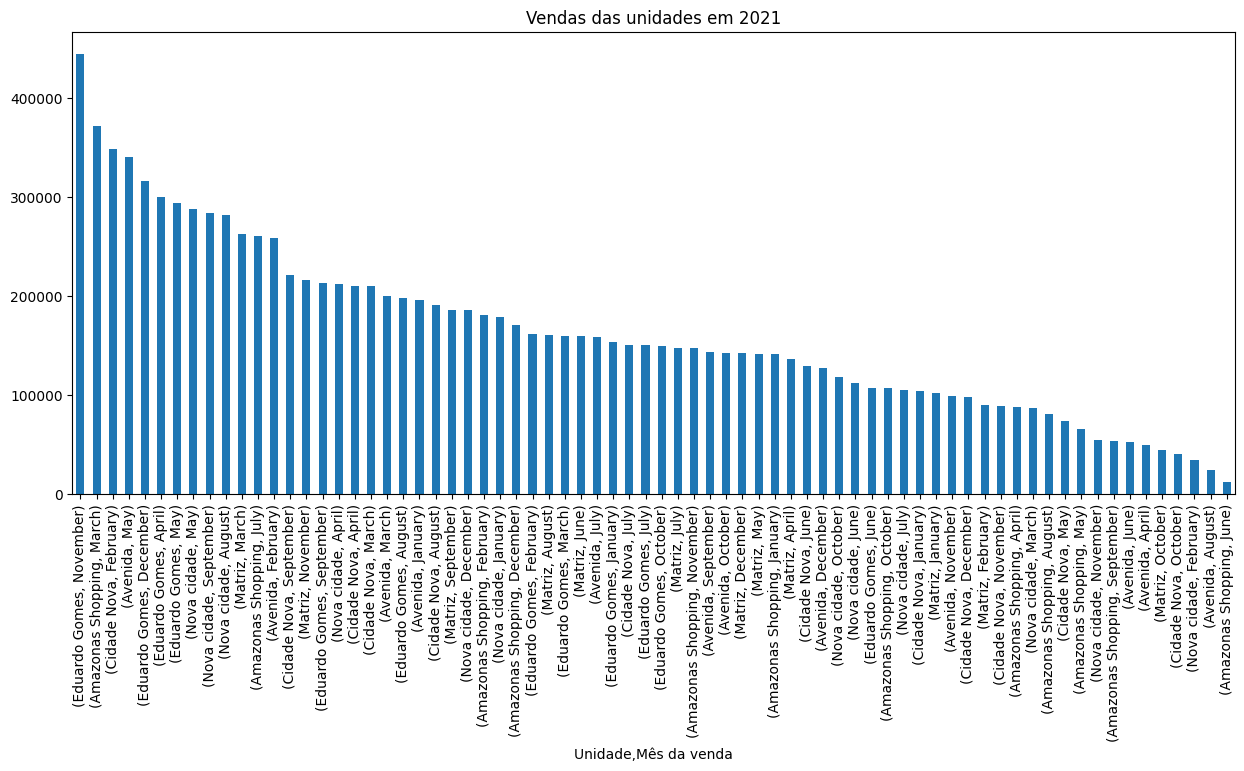

In [95]:
vendas_2021.groupby(['Unidade', 'Mês da venda'])['Valor vendido'].sum().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(15,6),
    title='Vendas das unidades em 2021'
    )


<Axes: title={'center': 'Vendas das unidades em 2022'}, xlabel='Unidade,Mês da venda'>

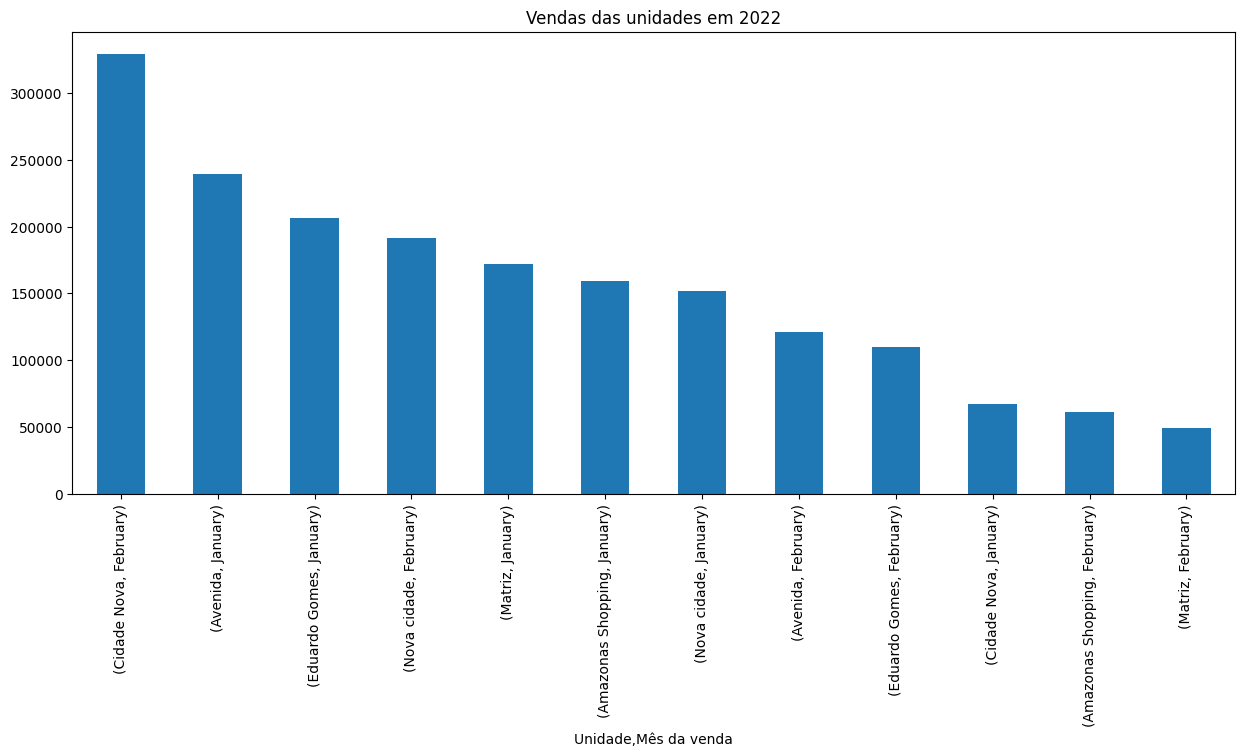

In [97]:
vendas_2022.groupby(['Unidade', 'Mês da venda'])['Valor vendido'].sum().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(15,6),
    title='Vendas das unidades em 2022'
    )
